 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Files to load 
df = pd.read_csv(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\algo_returns.csv")
print(df)
df = pd.read_csv(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\whale_returns.csv")
print(df)
df = pd.read_csv(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\sp_tsx_history.csv")
print(df)

            Date    Algo 1    Algo 2
0     2014-05-28  0.001745       NaN
1     2014-05-29  0.003978       NaN
2     2014-05-30  0.004464       NaN
3     2014-06-02  0.005692       NaN
4     2014-06-03  0.005292       NaN
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]
            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.00129

In [4]:
# Reading whale returns
wr = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\whale_returns.csv")
whale_returns_df = pd.read_csv(wr, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [5]:
# Count nulls
whale_returns_df.isnull()
whale_returns_df.isna().sum().sum()

4

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
ag = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\algo_returns.csv")
alg_daily_df = pd.read_csv(ag, index_col='Date', infer_datetime_format=True, parse_dates=True)
alg_daily_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
alg_daily_df.isnull()
alg_daily_df.isna().sum().sum()

6

In [9]:
# Drop nulls
alg_daily_df.dropna(inplace=True)
alg_daily_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [44]:
# Reading S&P TSX 60 Closing Prices
sptsx = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\sp_tsx_history.csv")
sptsx_ret_df = pd.read_csv(sptsx, index_col="Date", infer_datetime_format=True, parse_dates=True)
sptsx_ret_df.sort_index(inplace=True, ascending=True)
sptsx_ret_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [45]:
# Check Data Types
sptsx_ret_df.dtypes

Close    object
dtype: object

In [47]:
# Fix Data Types
sptsx_ret_df['Close'] = sptsx_ret_df['Close'].str.replace(',', '', regex=True)
sptsx_ret_df['Close'] = sptsx_ret_df['Close'].str.replace('$', '', regex=True)
sptsx_ret_df['Close'] = sptsx_ret_df['Close'].astype(float)
sptsx_ret_df.dtypes

Close    float64
dtype: object

In [51]:
# Calculate Daily Returns
sptsx_daily = sptsx_ret_df.pct_change()
sptsx_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [52]:
# Drop nulls
sptsx_daily = sptsx_daily.dropna().copy()
sptsx_daily.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [53]:
# Check 
sptsx_daily.isna().sum().sum()

0

In [55]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_daily = sptsx_daily.rename(columns = {"Close" : "S&P Daily"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [56]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, alg_daily_df, sptsx_daily], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

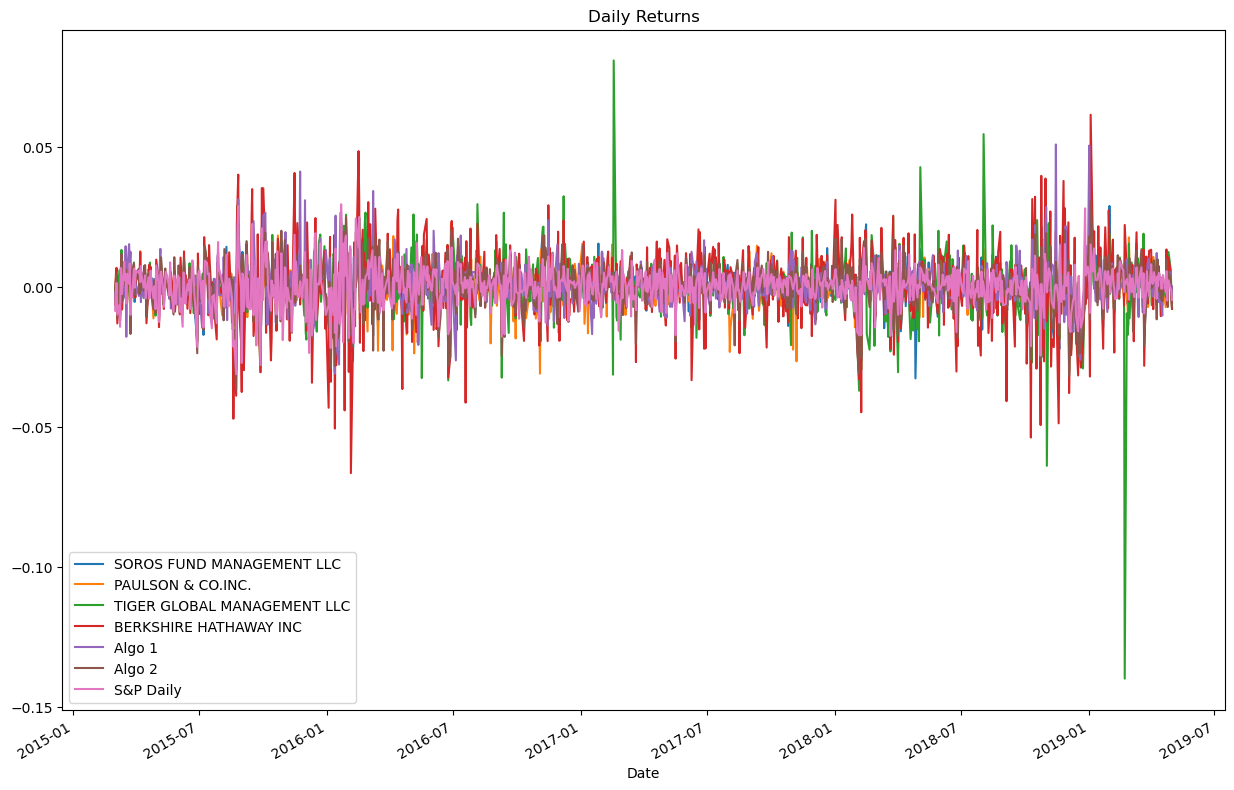

In [101]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10), title = 'Daily Returns')

#### Calculate and Plot cumulative returns.

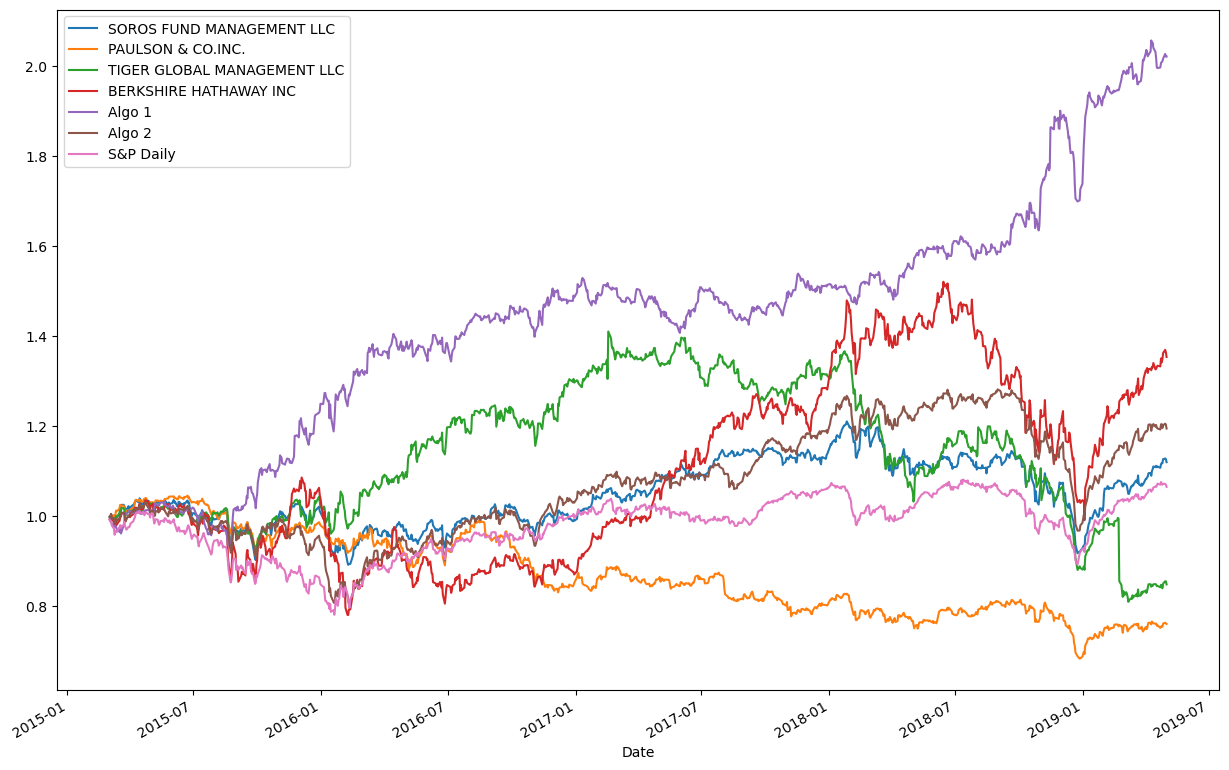

In [70]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative = (1+combined_df).cumprod().plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

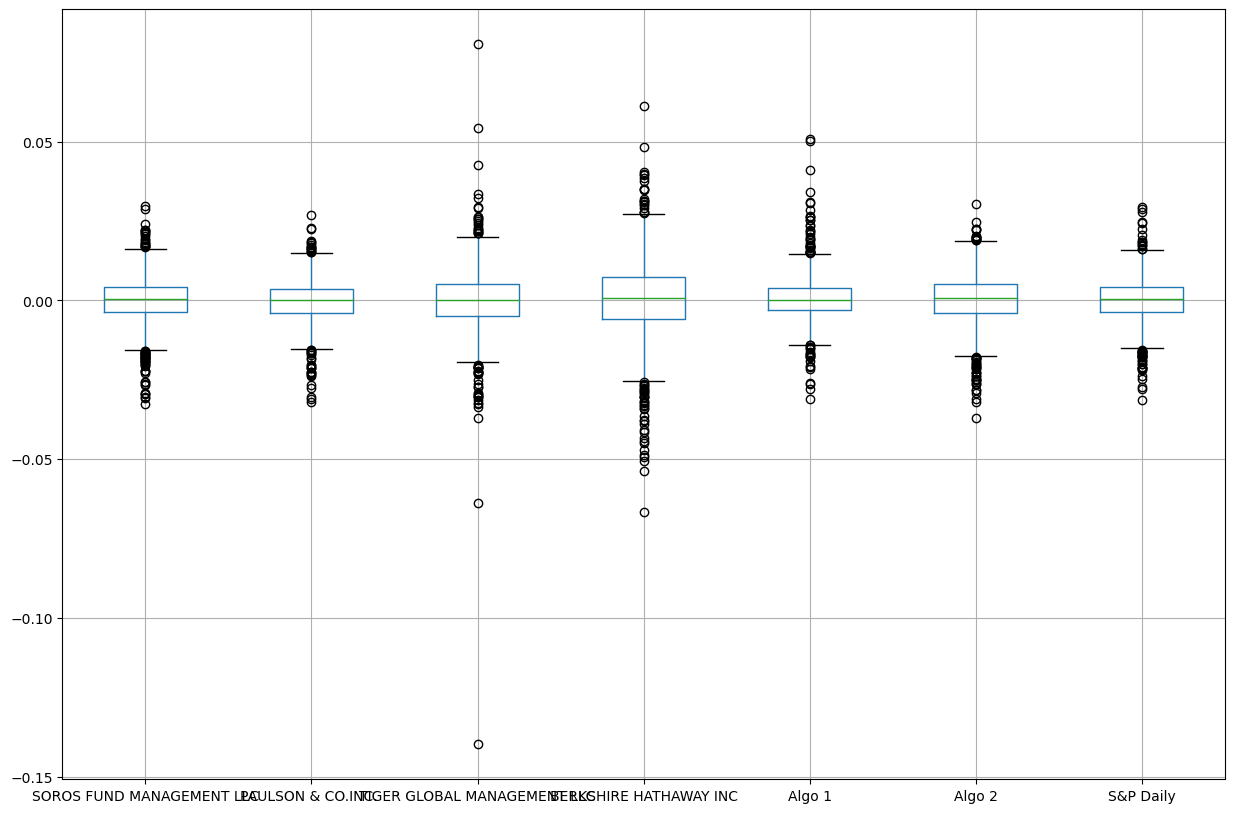

In [71]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(15,10))

### Calculate Standard Deviations

In [74]:
# Calculate the daily standard deviations of all portfolios
std=combined_df.std()
std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [64]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = combined_df["S&P Daily"].std()
# Determine which portfolios are riskier than the S&P TSX 60
combined_df.std() > sp_std


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P Daily                      False
dtype: bool

### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized standard deviation (252 trading days)
annualized = combined_df.std() * np.sqrt(252)
annualized.sort_values(inplace=True)
annualized.head()

PAULSON & CO.INC.            0.110841
S&P Daily                    0.111664
Algo 1                       0.120470
SOROS FUND MANAGEMENT LLC    0.124259
Algo 2                       0.132177
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

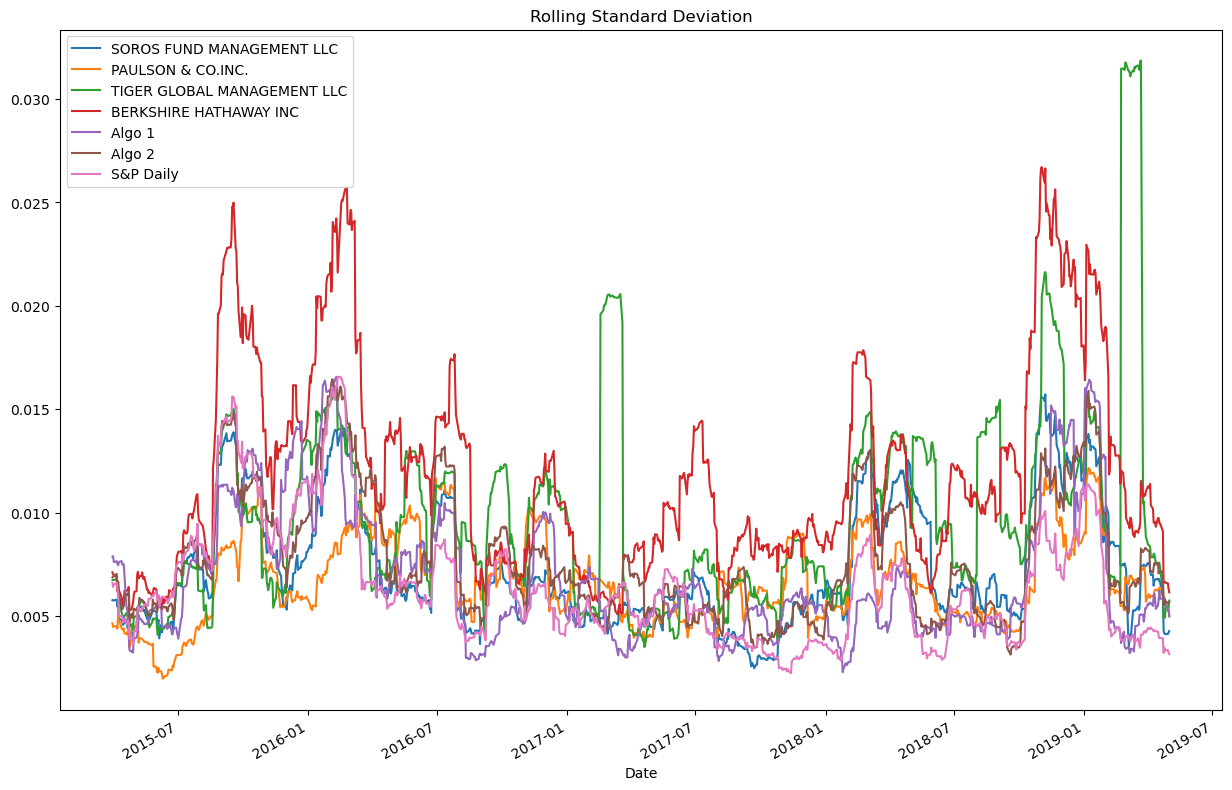

In [75]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingstd = combined_df.rolling(21).std()
rollingstd.dropna(inplace=True)

# Plot the rolling standard deviation
rollingstd.plot(figsize=(15,10), title='Rolling Standard Deviation')

### Calculate and plot the correlation

In [82]:
# Calculate the correlation
price_correlation = combined_df.corr()

# Display the correlation matrix
price_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P Daily,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

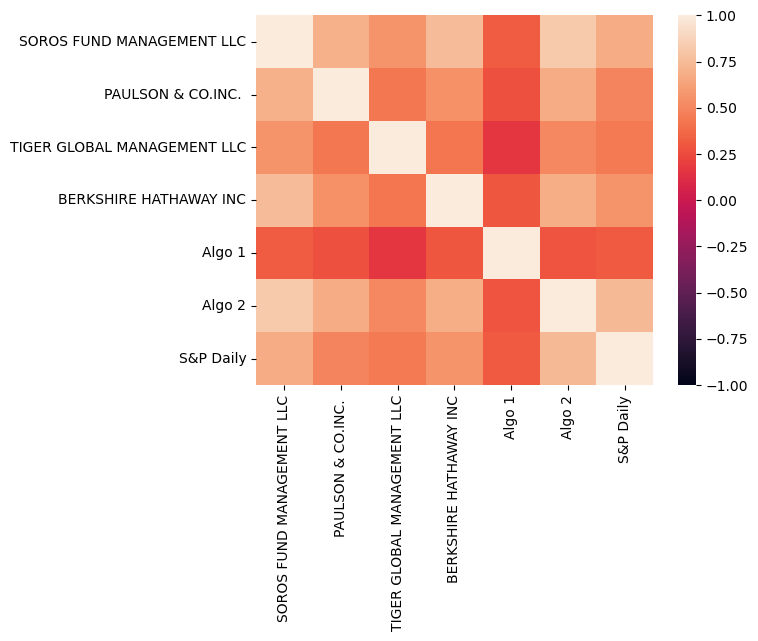

In [105]:
# Display the correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo 2 Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

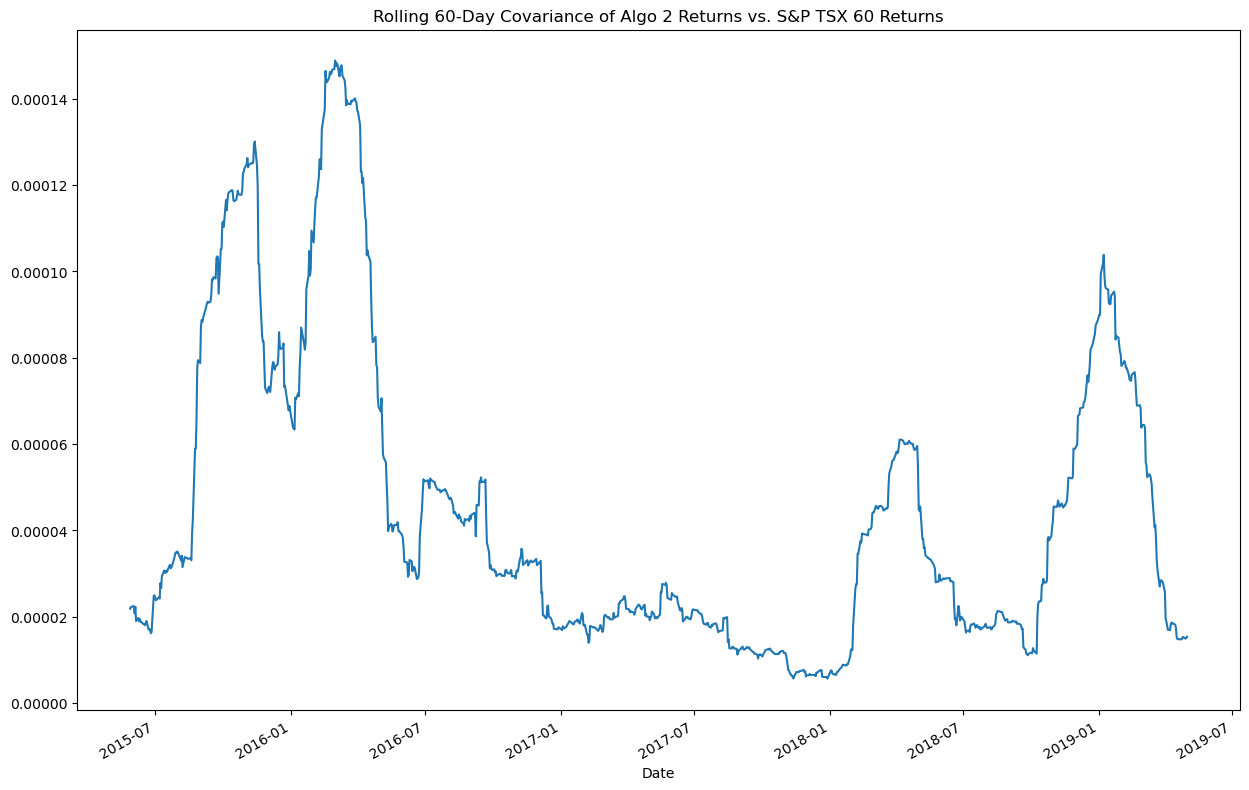

In [104]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 2'].cov(combined_df['S&P Daily'])

# Calculate variance of S&P TSX
variance = combined_df ['S&P Daily'].var()

# Computing beta
algo2_beta = covariance / variance

# Plot beta trend
rolling_covariance = combined_df['Algo 2'].rolling(window=60).cov(combined_df['S&P Daily'])
rolling_covariance.plot(figsize=(15, 10), title='Rolling 60-Day Covariance of Algo 2 Returns vs. S&P TSX 60 Returns')   

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [107]:
# Use `ewm` to calculate the rolling window
rolling_window = combined_df.ewm(halflife=21).std()
rolling_window

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


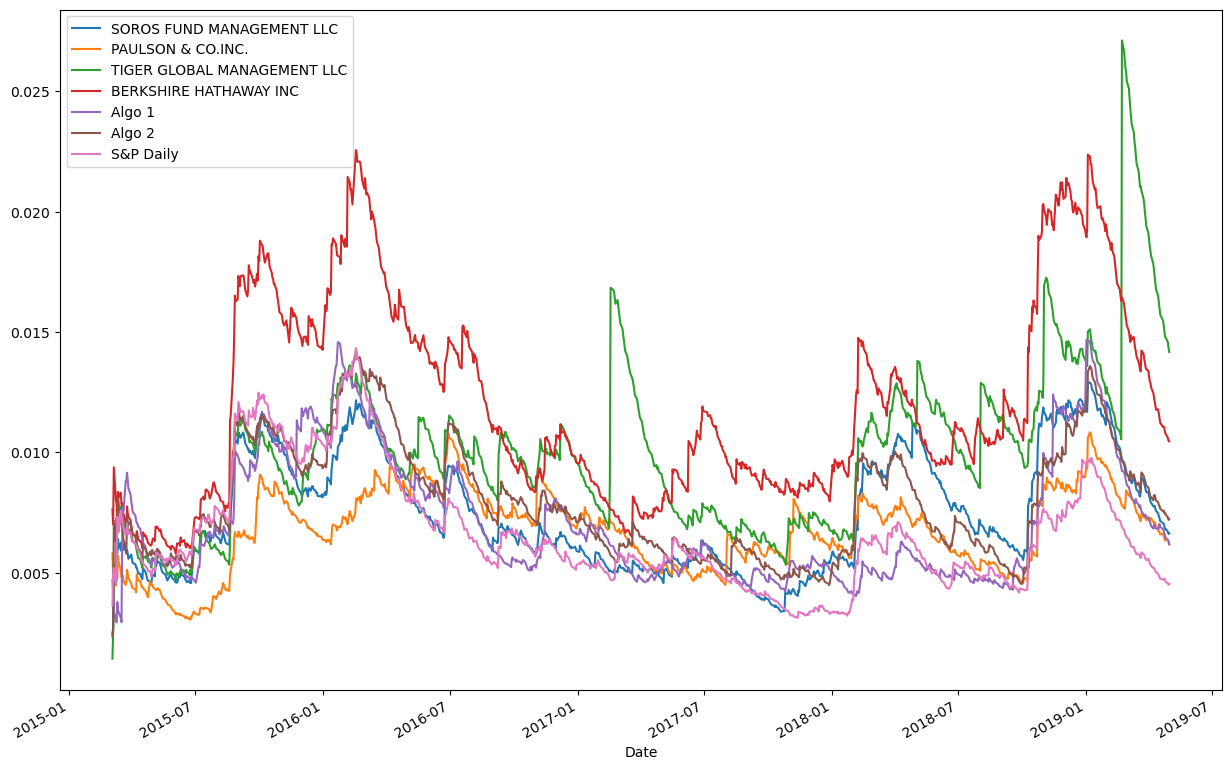

In [108]:
rolling_window = combined_df.ewm(halflife=21).std().plot(figsize=(15,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [114]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean()  * 252) / annualized
sharpe_ratios

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
S&P Daily                      0.195550
SOROS FUND MANAGEMENT LLC      0.286709
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

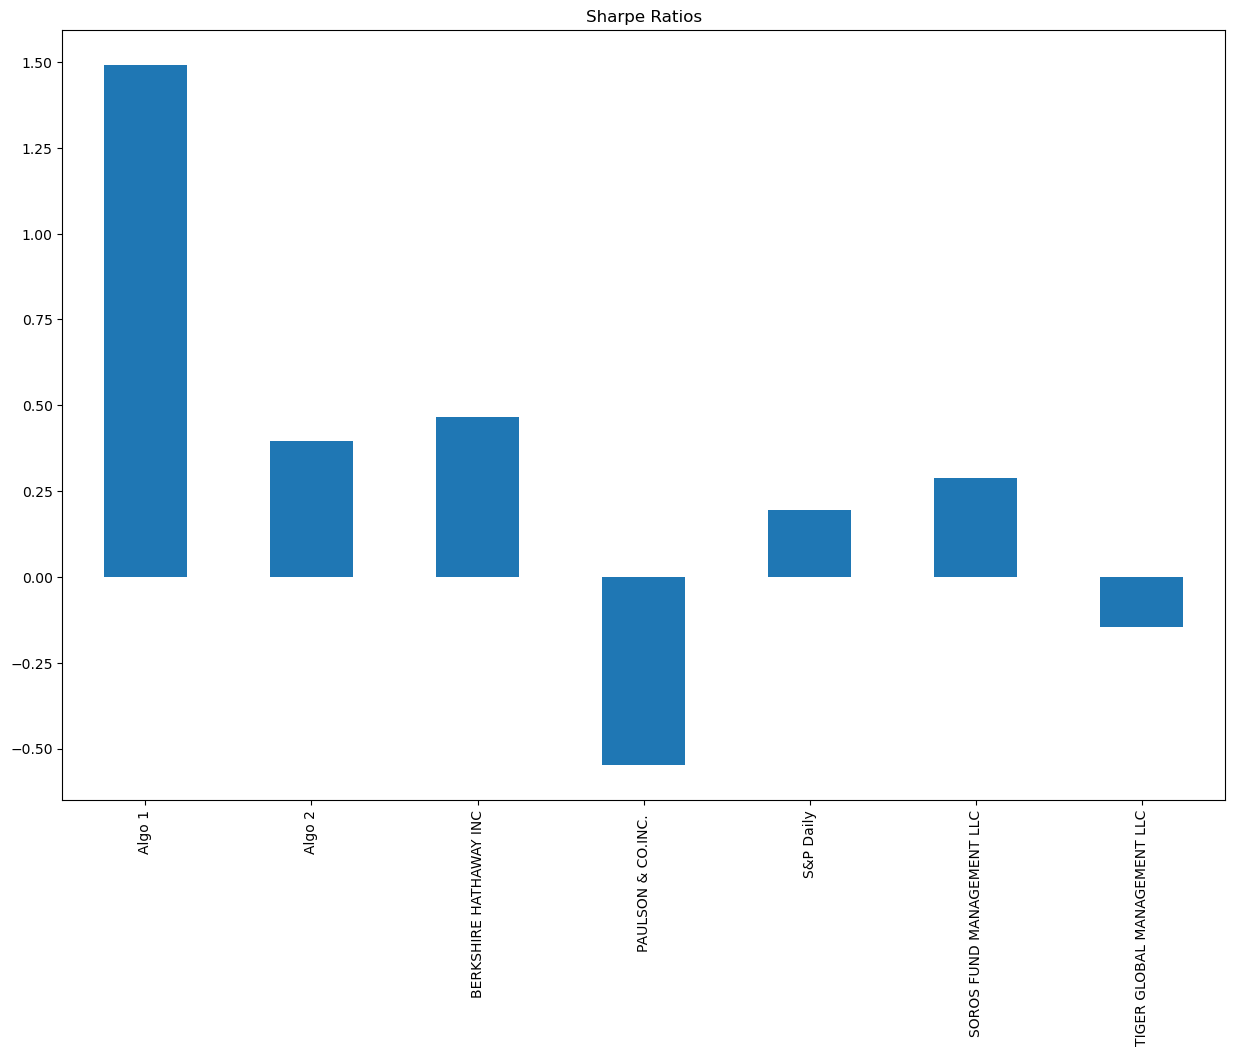

In [118]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(15,10), title= 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [8]:
# Reading data from 1st stock
amzn = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\AMZN.csv")
amzn_df = pd.read_csv(amzn,index_col='Date', infer_datetime_format=True, parse_dates=True)
amzn_df.dropna(inplace=True)
amzn_df = amzn_df.rename(columns = {'Close':'AMAZON'})
amzn_df.head()

,AMAZON
Date,
2021-12-13,169.567505
2021-12-14,169.091507
2021-12-15,173.315002
2021-12-16,168.871002
2021-12-17,170.017502


In [16]:
# Reading data from 2nd stock
btc = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\BTC-USD.csv")
btc_df = pd.read_csv(btc,index_col='Date', infer_datetime_format=True, parse_dates=True)
btc_df.dropna(inplace=True)
btc_df = btc_df.rename(columns = {'Close':'BITCOIN'})
btc_df.head().tail()

,BITCOIN
Date,
2021-12-13,46737.48047
2021-12-14,46612.63281
2021-12-15,48896.72266
2021-12-16,47665.42578
2021-12-17,46202.14453


In [14]:
# Reading data from 3rd stock
hmc = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\HMC.csv")
hmc_df = pd.read_csv(hmc,index_col='Date', infer_datetime_format=True, parse_dates=True)
hmc_df.dropna(inplace=True)
hmc_df = hmc_df.rename(columns = {'Close':'HONDA MOTOR COMPANY'})
hmc_df.head().tail()

,HONDA MOTOR COMPANY
Date,
2021-12-13,27.770000
2021-12-14,28.000000
2021-12-15,28.240000
2021-12-16,28.150000
2021-12-17,27.860001


In [17]:
# Combine all stocks in a single DataFrame
myportfolio_df = pd.concat([amzn_df, btc_df, hmc_df], axis = 'columns', join='inner')
myportfolio_df.head().tail()

,AMAZON,BITCOIN,HONDA MOTOR COMPANY
Date,,,
2021-12-13,169.567505,46737.48047,27.770000
2021-12-14,169.091507,46612.63281,28.000000
2021-12-15,173.315002,48896.72266,28.240000
2021-12-16,168.871002,47665.42578,28.150000
2021-12-17,170.017502,46202.14453,27.860001


In [18]:
# Reset Date index
myportfolio_df.sort_index(inplace=True)
myportfolio_df.head()

,AMAZON,BITCOIN,HONDA MOTOR COMPANY
Date,,,
2021-12-13,169.567505,46737.48047,27.770000
2021-12-14,169.091507,46612.63281,28.000000
2021-12-15,173.315002,48896.72266,28.240000
2021-12-16,168.871002,47665.42578,28.150000
2021-12-17,170.017502,46202.14453,27.860001


In [21]:
# Reorganize portfolio data by having a column per symbol
myportfolio_df.columns = ['AMZN','BITC', 'HMC']
myportfolio_df

,AMZN,BITC,HMC
Date,,,
2021-12-13,169.567505,46737.48047,27.770000
2021-12-14,169.091507,46612.63281,28.000000
2021-12-15,173.315002,48896.72266,28.240000
2021-12-16,168.871002,47665.42578,28.150000
2021-12-17,170.017502,46202.14453,27.860001
...,...,...,...
2022-12-06,88.250000,17089.50391,23.700001
2022-12-07,88.459999,16848.12695,23.850000
2022-12-08,90.349998,17233.47461,23.889999


In [23]:
# Calculate daily returns
daily_returns = myportfolio_df.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,AMZN,BITC,HMC
Date,,,
2021-12-14,-0.002807,-0.002671,0.008282
2021-12-15,0.024978,0.049002,0.008571
2021-12-16,-0.025641,-0.025182,-0.003187
2021-12-17,0.006789,-0.030699,-0.010302
2021-12-20,-0.017284,0.014678,-0.017947


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Date
2021-12-14    0.000935
2021-12-15    0.027517
2021-12-16   -0.018003
2021-12-17   -0.011404
2021-12-20   -0.006851
dtype: float64

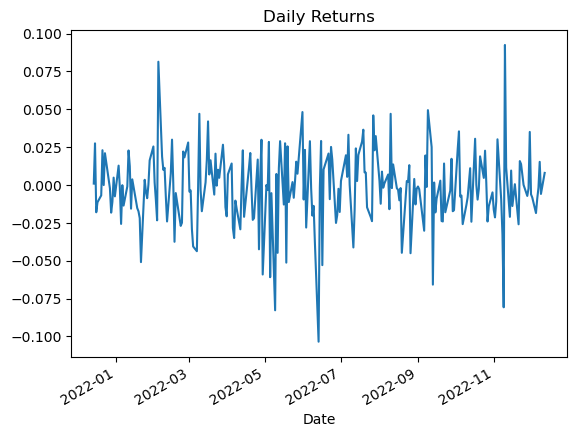

In [24]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myportfolio_returns = daily_returns.dot(weights)
myportfolio_returns.plot (title = 'Daily Returns')
                                                     

# Display sample data
myportfolio_returns.head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!